In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

import fidle.pwk as pwk

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print("x_train : ",x_train.shape)
print("y_train : ",y_train.shape)
print("x_test  : ",x_test.shape)
print("y_test  : ",y_test.shape)

x_train :  (60000, 28, 28)
y_train :  (60000,)
x_test  :  (10000, 28, 28)
y_test  :  (10000,)


(array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
        5949.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

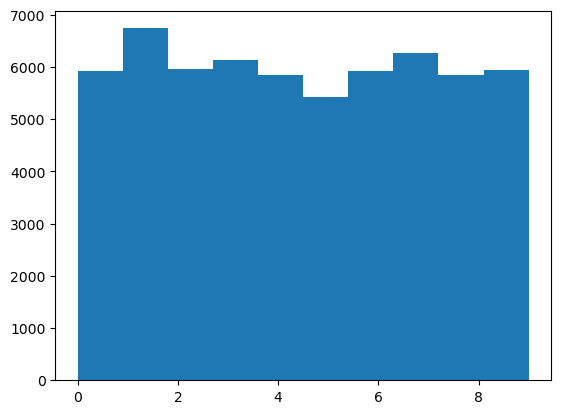

In [4]:
plt.hist(y_train)

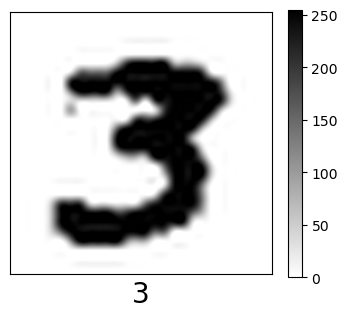

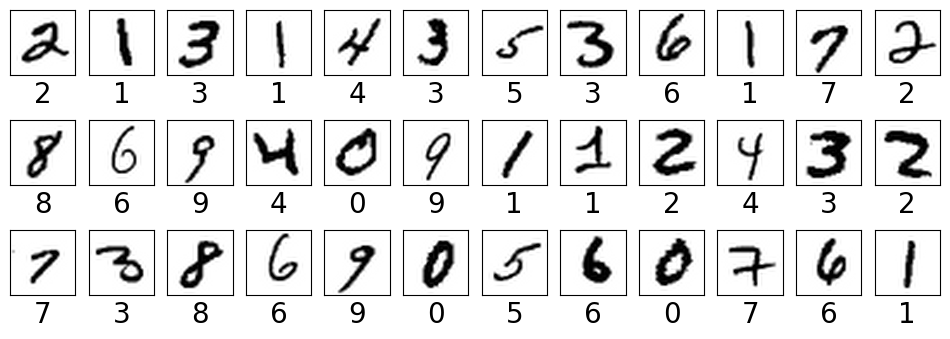

In [5]:
pwk.plot_images(x_train, y_train, [27],  x_size=5,y_size=5, colorbar=True, save_as='01-one-digit')
pwk.plot_images(x_train, y_train, range(5,41), columns=12, save_as='02-many-digits')

In [8]:
print('Before normalization : Min={}, max={}'.format(x_train.min(),x_train.max()))

xmax=x_train.max()
x_train = x_train / xmax
x_test  = x_test  / xmax

print('After normalization  : Min={}, max={}'.format(x_train.min(),x_train.max()))

Before normalization : Min=0, max=255
After normalization  : Min=0.0, max=1.0


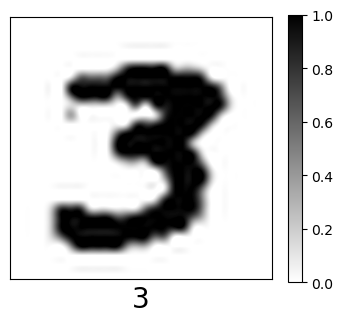

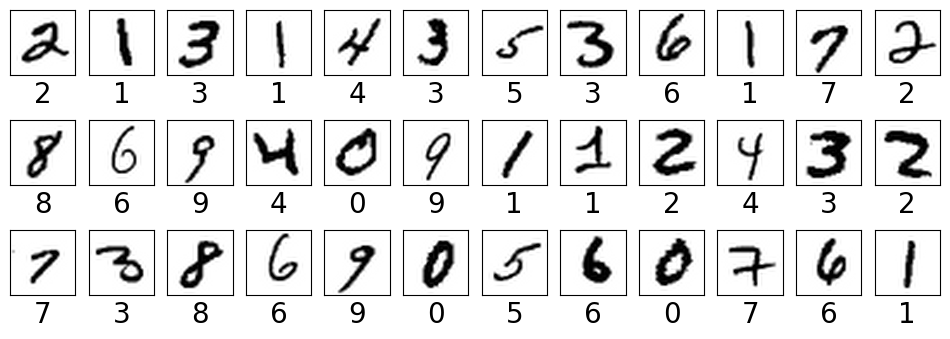

In [9]:
pwk.plot_images(x_train, y_train, [27],  x_size=5,y_size=5, colorbar=True, save_as='01-one-digit')
pwk.plot_images(x_train, y_train, range(5,41), columns=12, save_as='02-many-digits')

In [10]:
#hidden1     = 100
#hidden2     = 100

model = keras.Sequential([
#    keras.layers.Input((28,28)),
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense( 100, activation='relu'),
    keras.layers.Dense( 100, activation='relu'),
    keras.layers.Dense( 90, activation='relu'),
    keras.layers.Dense( 10, activation='softmax')
])

model.compile(optimizer='adam', #gradient descent https://keras.io/api/optimizers/
              loss='sparse_categorical_crossentropy', #cost function https://keras.io/api/losses/
              metrics=['accuracy']) #https://keras.io/api/metrics/

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 90)                9090      
                                                                 
 dense_3 (Dense)             (None, 10)                910       
                                                                 
Total params: 98,600
Trainable params: 98,600
Non-trainable params: 0
_________________________________________________________________


In [12]:
batch_size  = 512 #nb of samples through the network at the same time
epochs      =  16 #nb of iterations

history = model.fit(  x_train, y_train,
                      batch_size      = batch_size,
                      epochs          = epochs,
                      verbose         = 1,
                      validation_data = (x_test, y_test))

Epoch 1/16
118/118 [==============================] - 3s 14ms/step - loss: 0.5680 - accuracy: 0.8394 - val_loss: 0.2283 - val_accuracy: 0.9313
Epoch 2/16
118/118 [==============================] - 1s 10ms/step - loss: 0.1955 - accuracy: 0.9423 - val_loss: 0.1682 - val_accuracy: 0.9485
Epoch 3/16
118/118 [==============================] - 1s 10ms/step - loss: 0.1412 - accuracy: 0.9574 - val_loss: 0.1417 - val_accuracy: 0.9581
Epoch 4/16
118/118 [==============================] - 1s 10ms/step - loss: 0.1098 - accuracy: 0.9667 - val_loss: 0.1157 - val_accuracy: 0.9646
Epoch 5/16
118/118 [==============================] - 1s 10ms/step - loss: 0.0881 - accuracy: 0.9734 - val_loss: 0.1013 - val_accuracy: 0.9705
Epoch 6/16
118/118 [==============================] - 1s 9ms/step - loss: 0.0713 - accuracy: 0.9785 - val_loss: 0.1032 - val_accuracy: 0.9682
Epoch 7/16
118/118 [==============================] - 1s 9ms/step - loss: 0.0634 - accuracy: 0.9810 - val_loss: 0.0880 - val_accuracy: 0.9739
E

In [13]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss     :', score[0])
print('Test accuracy :', score[1])

Test loss     : 0.08979688584804535
Test accuracy : 0.9751999974250793


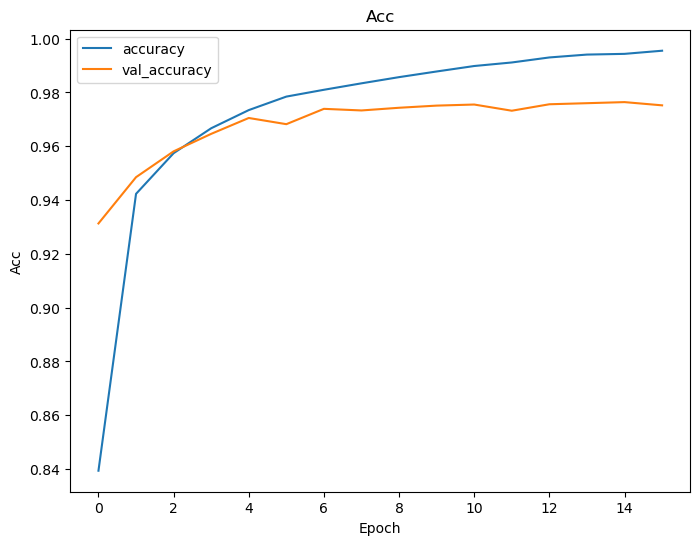

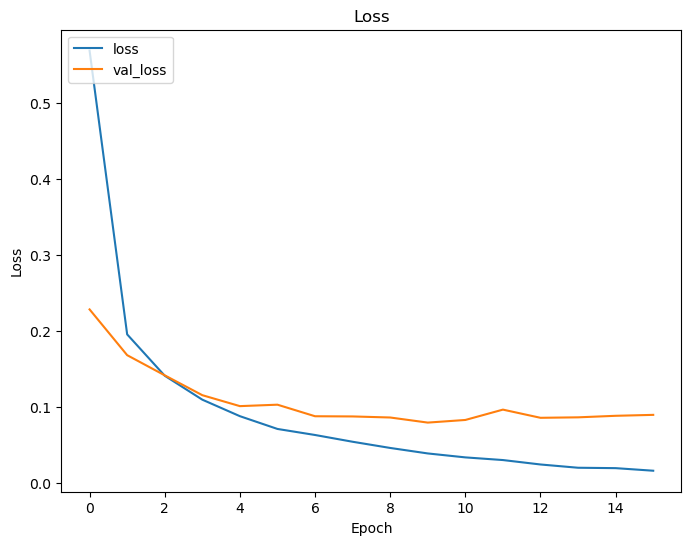

In [14]:
pwk.plot_history(history,  plot={'Acc':['accuracy','val_accuracy'],'Loss':['loss','val_loss']})

313/313 [==============================] - 1s 3ms/step


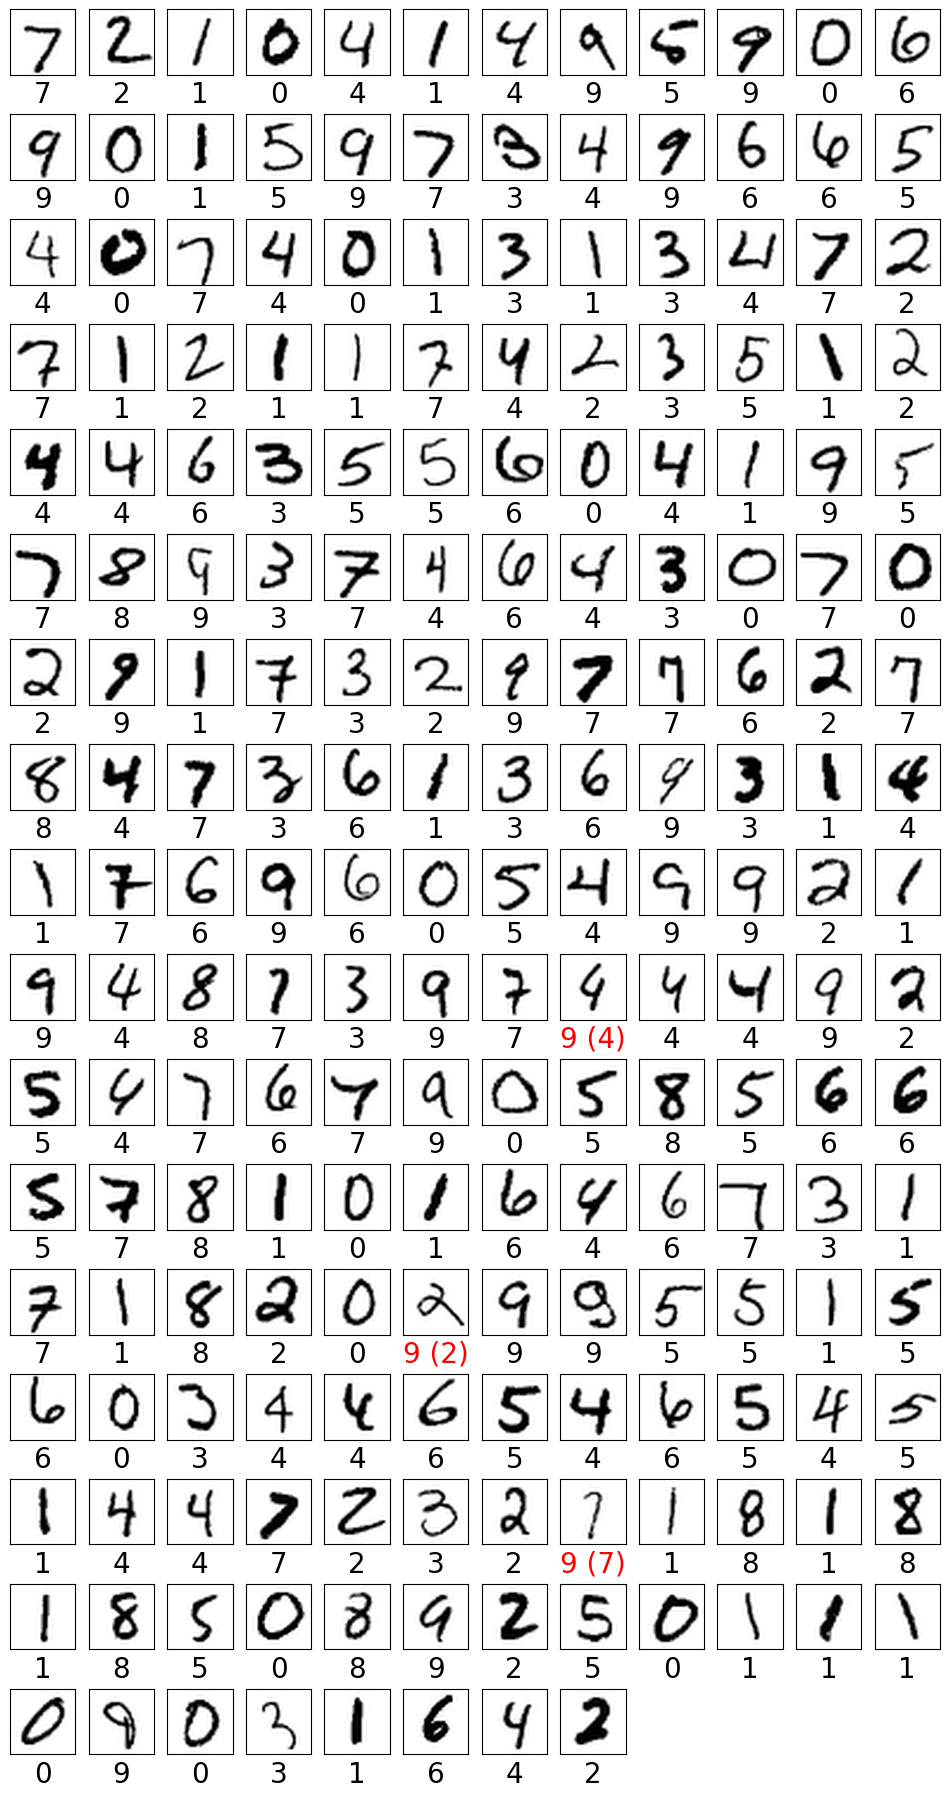

In [15]:
#y_pred   = model.predict_classes(x_test)           Deprecated after 01/01/2021 !!

y_sigmoid = model.predict(x_test)
y_pred    = np.argmax(y_sigmoid, axis=-1)

pwk.plot_images(x_test, y_test, range(0,200), columns=12, x_size=1, y_size=1, y_pred=y_pred, save_as='04-predictions')

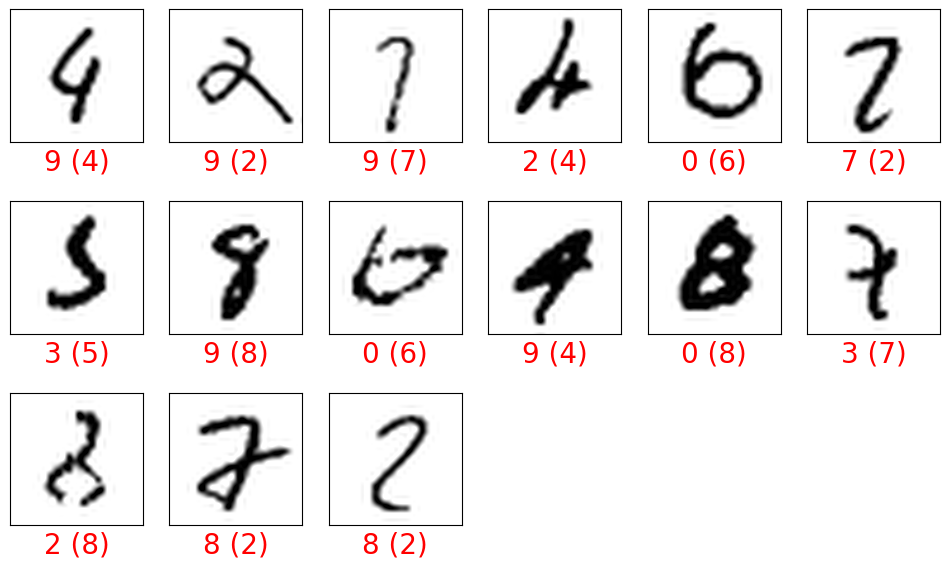

In [16]:
errors=[ i for i in range(len(x_test)) if y_pred[i]!=y_test[i] ]
errors=errors[:min(24,len(errors))]
pwk.plot_images(x_test, y_test, errors[:15], columns=6, x_size=2, y_size=2, y_pred=y_pred, save_as='05-some-errors')

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.98      0.97      0.97       892
           6       0.99      0.97      0.98       958
           7       0.99      0.97      0.98      1028
           8       0.97      0.96      0.96       974
           9       0.95      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.97      0.98     10000
weighted avg       0.98      0.98      0.98     10000

0.9752


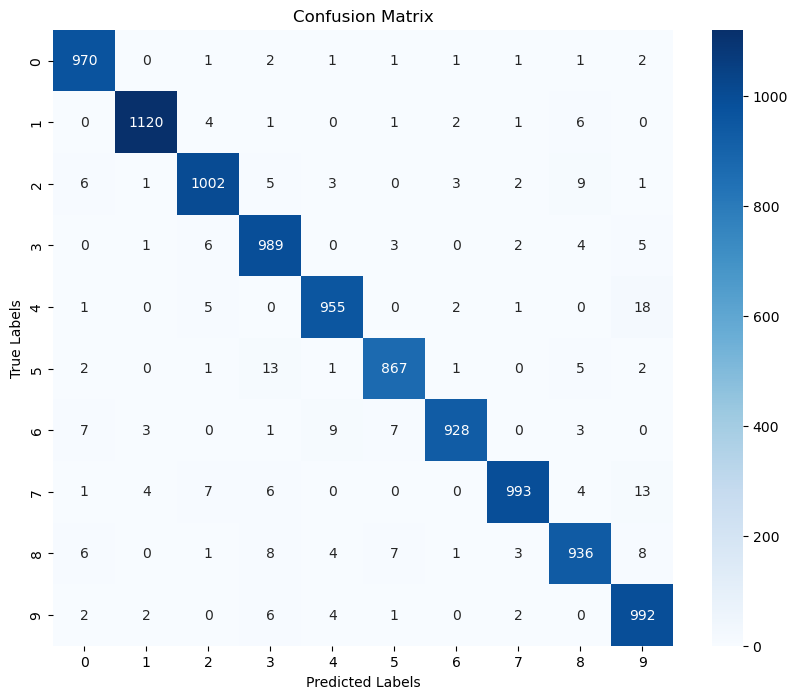

In [17]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
# import scikitplot as skplt 

print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()